# Walmart Coffee Listings Data Analysis

I took a dataset form Kaggle where coffee listing of 500 stores is accumulated.

Tools used: Pandas, NumPy, Matplotlib/Seaborn

This is the final course project I performed from the things I learned throughout the course, "Data Analysis with Python" by Jovian.ai

## Downloading the Dataset

Here, we have to copy the url of dataset and perform operations to download it.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# assigning variable to the url of dataset
dataset_url = 'https://www.kaggle.com/datasets/dimitryzub/walmart-coffee-listings-from-500-stores' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./walmart-coffee-listings-from-500-stores" (use force=True to force download)


The dataset has been downloaded and extracted.

In [5]:
# name to downloaded folder
data_dir = './walmart-coffee-listings-from-500-stores'

In [6]:
import os
os.listdir(data_dir)

['coffee-listings-from-all-walmart-stores.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "walmart-coffee-listings-data-analysis" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joshisudipsj01/walmart-coffee-listings-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/joshisudipsj01/walmart-coffee-listings-data-analysis


'https://jovian.ai/joshisudipsj01/walmart-coffee-listings-data-analysis'

## Data Preparation and Cleaning

Before exploring insights from and analyzing data, we need to clean and prepare the dataset. We load the dataset into a dataframe using Pandas. We explore several information and numerical description, and we classify them using different techniques in pandas.



In [11]:
import pandas as pd

In [12]:
coffee_raw_df = pd.read_csv(data_dir + "/coffee-listings-from-all-walmart-stores.csv")

In [13]:
coffee_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       1400 non-null   object 
 1   coffee_type                 1121 non-null   object 
 2   rating                      1400 non-null   float64
 3   reviews                     1400 non-null   int64  
 4   seller_name                 1400 non-null   object 
 5   thumbnail                   1400 non-null   object 
 6   price                       1400 non-null   float64
 7   weight                      1400 non-null   object 
 8   weight_formatted_to_gramms  1400 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 98.6+ KB


In [14]:
coffee_raw_df.describe()

,rating,reviews,price,weight_formatted_to_gramms
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,3.982643,440.853571,14.041343,621.391786
std,1.518037,879.351997,10.257832,369.564693
min,0.000000,0.000000,0.000000,0.000000
25%,4.300000,16.000000,7.950000,340.200000
50%,4.600000,136.000000,12.735000,567.000000
75%,4.800000,604.500000,16.990000,850.500000
max,5.000000,15148.000000,77.090000,2835.000000


In [15]:
coffee_raw_df.shape

(1400, 9)

In [16]:
coffee_raw_df.columns

Index(['title', 'coffee_type', 'rating', 'reviews', 'seller_name', 'thumbnail',
       'price', 'weight', 'weight_formatted_to_gramms'],
      dtype='object')

In [17]:
type(coffee_raw_df)

pandas.core.frame.DataFrame

In [18]:
coffee_raw_df

,title,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,https://i5.walmartimages.com/asr/1fbbd523-8554...,13.92,40.3-ounce,1142.5
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,walmart.com,https://i5.walmartimages.com/asr/99a53df0-0471...,3.76,10 oz,283.5
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,walmart.com,https://i5.walmartimages.com/asr/e6aba325-608e...,9.97,25.9 ounce,734.3
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,walmart.com,https://i5.walmartimages.com/asr/a5be9586-b75d...,9.92,42.5 oz,1204.9
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,walmart.com,https://i5.walmartimages.com/asr/de42310c-4cd6...,9.98,48 oz,1360.8
...,...,...,...,...,...,...,...,...,...
1395,xhao reusable capsules easy to clean easy to u...,NaN,0.0,0,joybuy selection,https://i5.walmartimages.com/asr/5aa587bd-9757...,13.89,not mentioned,272.2
1396,cafe yaucono espresso dark roast ground coffee...,"espresso,dark roast",0.0,0,"coffee & filters direct, inc",https://i5.walmartimages.com/asr/073bdc20-ad75...,10.99,8.8 oz,249.5
1397,"starbucks dark roast coffee with 2x caffeine, ...","arabica,dark roast",4.3,5036,walmart.com,https://i5.walmartimages.com/asr/242294ac-0c7d...,12.98,12 c,340.2
1398,"starbucks holiday blend, medium roast k-cup co...","arabica,medium roast",4.5,397,walmart.com,https://i5.walmartimages.com/asr/3a714e3e-a30e...,17.72,22 c,623.7


## Classifying coffee based on their ratings
Below, we can see different coffee types on a list based on their ratings.

In [19]:
coffee_raw_df.at[1200,'rating']

4.7

In [20]:
coffee_raw_df[['title','rating']]

,title,rating
0,"folgers classic roast ground coffee, 40.3-ounce",3.8
1,"café bustelo, espresso style dark roast ground...",4.7
2,"folgers classic roast ground coffee, medium ro...",4.4
3,"maxwell house original roast ground coffee, 42...",4.8
4,great value classic roast medium ground coffee...,4.7
...,...,...
1395,xhao reusable capsules easy to clean easy to u...,0.0
1396,cafe yaucono espresso dark roast ground coffee...,0.0
1397,"starbucks dark roast coffee with 2x caffeine, ...",4.3
1398,"starbucks holiday blend, medium roast k-cup co...",4.5


## Highest rated coffees 

In [21]:
toprated_coffee_df = coffee_raw_df.sort_values('rating', ascending=False).head(10)

In [22]:
toprated_coffee_df[['title','rating']]

,title,rating
692,papanicholas coffee hawaiian island blend whol...,5.0
921,dunkin' 10 ounce cold roast &amp; ground coffe...,5.0
633,black rifle coffee spirit of '76 single-serve ...,5.0
898,arabica ground 100% coffee 126 pk,5.0
582,"kauai coffee na pali coast k-cup coffee pods, ...",5.0
909,verena street cow tipper flavored ground coffe...,5.0
1348,yaucono ground coffee 10 oz can,5.0
1216,caf la carreta cuban espresso coffee 10 oz brick,5.0
1231,papanicholas italian expresso 24ct,5.0
518,"death wish coffee, organic, fair-trade, espres...",5.0


## Lowest Rated Coffees

In [23]:
lowrated_coffee_df = coffee_raw_df.sort_values('rating', ascending=False).tail(10)

In [24]:
lowrated_coffee_df[['title','rating']]

,title,rating
694,4-arabica-coffee arabica coffee plant in 4 in....,0.0
703,lion coffee coffee original apg 10.000 oz,0.0
706,coffee,0.0
711,xhao reusable capsules easy to clean easy to u...,0.0
712,"french roast single coffee cup, (regular) 100%...",0.0
1287,lion diamond head espresso coffee 10 oz ground,0.0
714,"caramal machiatto single coffee cup, (regular)...",0.0
1289,"enderly coffee company - brazil single origin,...",0.0
715,"kingdom coffee - african coffee, medium-light ...",0.0
1018,coffee,0.0


## Highly rated coffees
We have classified coffees with a rating greater than 4.9

# Based on customer reviews, these are out best rated coffee products!
We highly recommend our new customers to try these out.


In [25]:
highrated_coffees_df = coffee_raw_df[coffee_raw_df.rating>=4.9]

In [26]:
highrated_coffees_df

,title,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
10,"folgers black silk ground coffee, smooth dark ...","black silk ground coffee,dark roast",4.9,20,walmart.com,https://i5.walmartimages.com/asr/8c6786c1-a461...,13.98,33.7ounce,955.4
46,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.9,15148,walmart.com,https://i5.walmartimages.com/asr/cd17e897-99ca...,13.92,48 oz,1360.8
60,"folgers black silk ground coffee, smooth dark ...","black silk ground coffee,dark roast",4.9,20,walmart.com,https://i5.walmartimages.com/asr/8c6786c1-a461...,13.98,33.7ounce,955.4
110,"folgers black silk ground coffee, smooth dark ...","black silk ground coffee,dark roast",4.9,20,walmart.com,https://i5.walmartimages.com/asr/8c6786c1-a461...,13.98,33.7ounce,955.4
139,community coffee signature blend medium roast ...,medium roast,4.9,851,shaan super store,https://i5.walmartimages.com/asr/09d229fd-83e4...,24.18,32 oz,907.2
...,...,...,...,...,...,...,...,...,...
1340,"jm smucker folgers coffee, 33.9 oz",NaN,4.9,2172,big deal ga,https://i5.walmartimages.com/asr/a22f5995-4171...,26.59,33.9 oz,961.0
1347,"door county coffee decaf breakfast blend, cost...","arabica,medium roast",4.9,63,avenue a stores llc,https://i5.walmartimages.com/asr/d53f6918-f642...,22.08,10oz,283.5
1348,yaucono ground coffee 10 oz can,NaN,5.0,3,"coffee & filters direct, inc",https://i5.walmartimages.com/asr/94dc5a6e-30c2...,12.99,10 oz,283.5
1360,"folgers black silk ground coffee, smooth dark ...","black silk ground coffee,dark roast",4.9,20,walmart.com,https://i5.walmartimages.com/asr/8c6786c1-a461...,13.98,33.7ounce,955.4


In [27]:
##best and most affordable coffees
bestaffordable_df = highrated_coffees_df[highrated_coffees_df.price<13]

In [28]:
bestaffordable_df.sort_values('price')

,title,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
1023,"eight o'clock, the original medium roast, grou...",medium roast,4.9,55,shaan super store,https://i5.walmartimages.com/asr/d5f8be92-33aa...,0.00,12 oz,340.2
1001,"door county coffee bourbon vanilla cream, bour...","arabica,medium roast",4.9,43,door county coffee,https://i5.walmartimages.com/asr/435335a7-6097...,0.00,10oz,283.5
663,cafe bustelo decaffeinated ground coffee,NaN,4.9,26,walmart.com,https://i5.walmartimages.com/asr/47f02737-4712...,0.00,not mentioned,340.2
798,cafe el morro espresso dark roast caffeinated ...,"espresso,dark roast",5.0,2,walmart.com,https://i5.walmartimages.com/asr/a9cbaeab-5c8e...,1.78,8.8 oz,249.5
845,"cafe aroma espresso ground coffee, dark roast ...","espresso,dark roast",5.0,1,walmart.com,https://i5.walmartimages.com/asr/29f9ac17-a449...,1.98,8.8 oz,249.5
460,"black rifle ready-to-drink coffee, espresso wi...",espresso,5.0,8,walmart.com,https://i5.walmartimages.com/asr/1d93115e-ed2f...,2.68,11oz,311.8
488,"black rifle ready-to-drink coffee, espresso mo...","espresso,mocha",5.0,6,walmart.com,https://i5.walmartimages.com/asr/aeae38b6-4a32...,2.68,11oz,311.8
795,colcafe instant colcafe powdered instant coffe...,instant coffee,4.9,16,walmart.com,https://i5.walmartimages.com/asr/40833152-2317...,4.98,6.0 oz,170.1
667,"yaucono coffee fresh pack, 14 oz",NaN,4.9,86,walmart.com,https://i5.walmartimages.com/asr/7a47c21e-12b3...,5.44,14 oz,396.9
583,cameron's coffee flavored sea salt caramel gro...,"caramel,light roast",4.9,7,walmart.com,https://i5.walmartimages.com/asr/05cfb98e-e2b8...,5.92,12 oz,340.2


In [29]:
import jovian

In [30]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joshisudipsj01/walmart-coffee-listings-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/joshisudipsj01/walmart-coffee-listings-data-analysis


'https://jovian.ai/joshisudipsj01/walmart-coffee-listings-data-analysis'

## Exploratory Analysis and Visualization

We combine different insights we got using pandas and create some visualizations using those informations.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [71]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [72]:
coffee_raw_df

,title,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,https://i5.walmartimages.com/asr/1fbbd523-8554...,13.92,40.3-ounce,1142.5
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,walmart.com,https://i5.walmartimages.com/asr/99a53df0-0471...,3.76,10 oz,283.5
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,walmart.com,https://i5.walmartimages.com/asr/e6aba325-608e...,9.97,25.9 ounce,734.3
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,walmart.com,https://i5.walmartimages.com/asr/a5be9586-b75d...,9.92,42.5 oz,1204.9
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,walmart.com,https://i5.walmartimages.com/asr/de42310c-4cd6...,9.98,48 oz,1360.8
...,...,...,...,...,...,...,...,...,...
1395,xhao reusable capsules easy to clean easy to u...,NaN,0.0,0,joybuy selection,https://i5.walmartimages.com/asr/5aa587bd-9757...,13.89,not mentioned,272.2
1396,cafe yaucono espresso dark roast ground coffee...,"espresso,dark roast",0.0,0,"coffee & filters direct, inc",https://i5.walmartimages.com/asr/073bdc20-ad75...,10.99,8.8 oz,249.5
1397,"starbucks dark roast coffee with 2x caffeine, ...","arabica,dark roast",4.3,5036,walmart.com,https://i5.walmartimages.com/asr/242294ac-0c7d...,12.98,12 c,340.2
1398,"starbucks holiday blend, medium roast k-cup co...","arabica,medium roast",4.5,397,walmart.com,https://i5.walmartimages.com/asr/3a714e3e-a30e...,17.72,22 c,623.7


# Visualization: 1
Here, we create a histogram to find the range of values based on their ratings. 
In this figure, we didn't use a semi-colon at the end, so it gives a description of arrays before displaying the plot.

(array([168.,   0.,   1.,   1.,   1.,   3.,  15.,  99., 196., 916.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

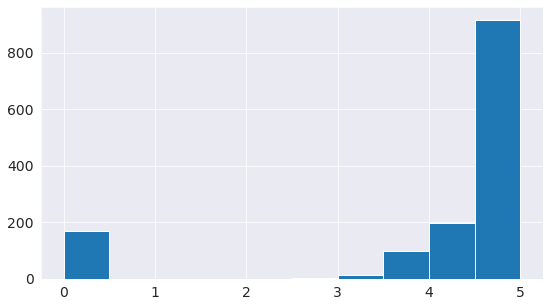

In [73]:
plt.hist(coffee_raw_df.rating)

# Visualization: 2
In this histogram, we improvise previous plot, and keep meaningful data with great distribution of data using np.arange and assigning number and range of bins.

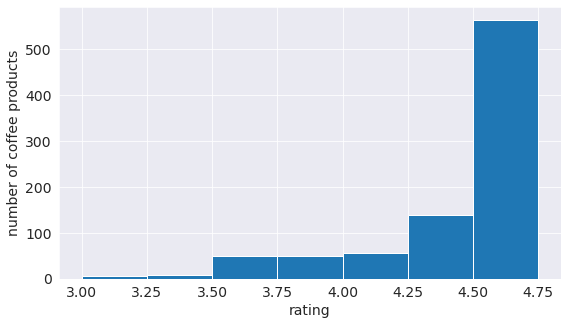

In [76]:
import numpy as np
plt.hist(coffee_raw_df.rating, bins = np.arange(3,5,0.25))
plt.xlabel('rating')
plt.ylabel('number of coffee products');


# Visualization: 3
We try to get an insight from data using a line chart

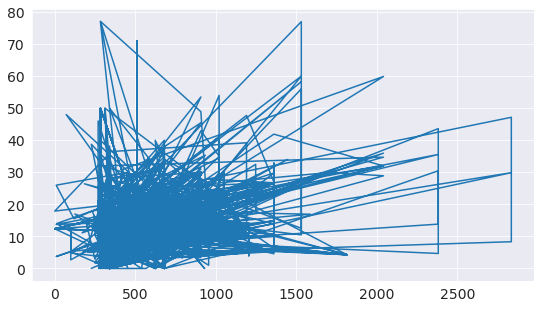

In [77]:
plt.plot(coffee_raw_df.weight_formatted_to_gramms, coffee_raw_df.price)

line chart is not the appropriate plotting technique, so we have to try scatterplot to get some insights from this data.

# Visualization: 4
We use two numerical datum (weight and price) to see if pricing is affected with weight, and how the products are distributed.

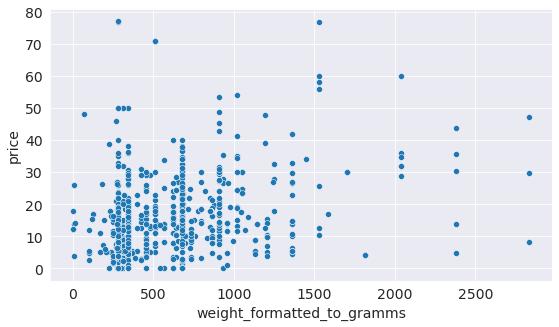

In [78]:
sns.scatterplot(x ='weight_formatted_to_gramms', y = 'price', data= coffee_raw_df);

# Visualization: 5
sns.barplot is used to get an average and variance of data in the particular values. In this bar plotting, we get averages of different rating range and how rating has affected prices of the products.

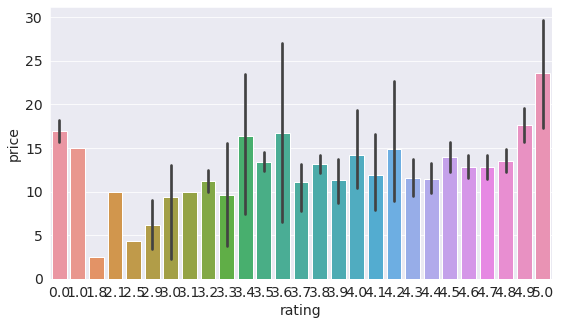

In [79]:
sns.barplot(x='rating', y = 'price', data= coffee_raw_df);

# Visualization:6
It can be assumed that more reviews mean more people has bought and used that product. And, we see that products with higher rating have also received more number of reviews. 

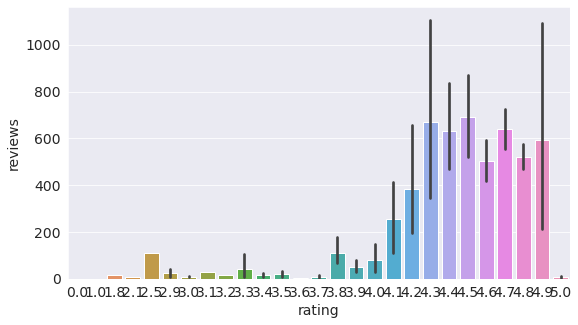

In [80]:
sns.barplot(x='rating', y = 'reviews', data= coffee_raw_df);

## 1. What are some affordable and good coffee products available in Walmart's coffee listing?

In [81]:
bestaffordable_df.sort_values('price')

,title,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
1023,"eight o'clock, the original medium roast, grou...",medium roast,4.9,55,shaan super store,https://i5.walmartimages.com/asr/d5f8be92-33aa...,0.00,12 oz,340.2
1001,"door county coffee bourbon vanilla cream, bour...","arabica,medium roast",4.9,43,door county coffee,https://i5.walmartimages.com/asr/435335a7-6097...,0.00,10oz,283.5
663,cafe bustelo decaffeinated ground coffee,NaN,4.9,26,walmart.com,https://i5.walmartimages.com/asr/47f02737-4712...,0.00,not mentioned,340.2
798,cafe el morro espresso dark roast caffeinated ...,"espresso,dark roast",5.0,2,walmart.com,https://i5.walmartimages.com/asr/a9cbaeab-5c8e...,1.78,8.8 oz,249.5
845,"cafe aroma espresso ground coffee, dark roast ...","espresso,dark roast",5.0,1,walmart.com,https://i5.walmartimages.com/asr/29f9ac17-a449...,1.98,8.8 oz,249.5
460,"black rifle ready-to-drink coffee, espresso wi...",espresso,5.0,8,walmart.com,https://i5.walmartimages.com/asr/1d93115e-ed2f...,2.68,11oz,311.8
488,"black rifle ready-to-drink coffee, espresso mo...","espresso,mocha",5.0,6,walmart.com,https://i5.walmartimages.com/asr/aeae38b6-4a32...,2.68,11oz,311.8
795,colcafe instant colcafe powdered instant coffe...,instant coffee,4.9,16,walmart.com,https://i5.walmartimages.com/asr/40833152-2317...,4.98,6.0 oz,170.1
667,"yaucono coffee fresh pack, 14 oz",NaN,4.9,86,walmart.com,https://i5.walmartimages.com/asr/7a47c21e-12b3...,5.44,14 oz,396.9
583,cameron's coffee flavored sea salt caramel gro...,"caramel,light roast",4.9,7,walmart.com,https://i5.walmartimages.com/asr/05cfb98e-e2b8...,5.92,12 oz,340.2


## 2. Do customers seem to be impressed with the coffee products?

From visualization-2, we can visulaize that most of the coffee products have rating more than 4.00, so it can be believed that customers are impressed with walmart coffee listings' ratings.

## 3. What is the major price range and quantity of the coffee products?

Visualization 4: the major price range is between 10-20 dollars, and the coffee products with less quantity have price set less than 20$, and the prices for coffee products with bigger quantity have more variance and there is less data about coffees with bigger quantities. 

## 4. How are the prices fixed?

From the barplot in visualization- 5, we can clearly see that highly rated coffee products(4.9,5.0) are priced high. We can assume that the prices are set based on customer ratings, and the number of reviews they are getting on those products.

## 5. What are products that customers who depend on ratings can't rely on?

Visualization: 5 The variance at mid rated product(3.6) is highest, i.e. price is fluctuating, so we can assume that some of those products had high price but could not satisfy customers well, while some products in that rating category satisfied customers well.

## 6. Are customers relying on product reviews?

Visualization 6: products in coffee listings with higher ratings has been reviewed more than lower rating products. We can get an insight that people tend to rely on reviews and try well-reviewed coffee product.

In [82]:
import jovian

In [83]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joshisudipsj01/walmart-coffee-listings-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/joshisudipsj01/walmart-coffee-listings-data-analysis


'https://jovian.ai/joshisudipsj01/walmart-coffee-listings-data-analysis'

## Inferences and Conclusion

In this notebook, we converted comma separated value(CSV) file of Walmart's coffee listing into a Pandas dataframe, cleaned the data, explored the clean data using different functions in NumPy and Pandas, made some assumptions, and to get better insights, we created histogram, plots, and bar graphs and got visualizations from the dataset. Finally, we answered some questions. This was my first ever project on Data Analysis, and using data analysis tools for cleaning,exploration, and visualization, more insights can be discovered from any dataset.

In [84]:
import jovian

In [85]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joshisudipsj01/walmart-coffee-listings-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/joshisudipsj01/walmart-coffee-listings-data-analysis


'https://jovian.ai/joshisudipsj01/walmart-coffee-listings-data-analysis'